In [2]:
import kagglehub
path = kagglehub.dataset_download("khushikyad001/covid-19-symptoms-and-severity-prediction-dataset")
print("Path to dataset files:", path)

100%|██████████| 19.3k/19.3k [00:00<00:00, 25.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/khushikyad001/covid-19-symptoms-and-severity-prediction-dataset/versions/1


In [3]:
import os
import pandas as pd
# Print files inside Kaggle download folder
dataset_path = "/root/.cache/kagglehub/datasets/khushikyad001/covid-19-symptoms-and-severity-prediction-dataset/versions/1"
print(os.listdir(dataset_path))

['covid_symptoms_severity_prediction.csv']


In [4]:
df = pd.read_csv(dataset_path + "/covid_symptoms_severity_prediction.csv")
print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,age,gender,vaccination_status,fever,cough,fatigue,shortness_of_breath,loss_of_smell,headache,diabetes,hypertension,heart_disease,asthma,cancer,hospitalized,icu_admission,mortality
0,51,Male,Unvaccinated,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,92,Male,Fully Vaccinated,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,14,Male,Fully Vaccinated,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,71,Male,Fully Vaccinated,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,60,Male,Unvaccinated,0,1,1,1,1,0,1,1,1,0,0,1,1,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
print("Original Dataset Shape:", df.shape)
print("\nFirst 5 rows of Original Dataset:")
display(df.head())
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())
df = df.fillna(df.median(numeric_only=True))
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])
print("\nDataset After Encoding (First 5 rows):")
display(df.head())
X = df.drop("hospitalized", axis=1)
y = df["hospitalized"]
print("\nTarget Column Distribution (hospitalized):")
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTrain-Test Split Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nBefore Scaling (First 5 rows of X_train):")
display(X_train.head())
print("\nAfter Scaling (First 5 rows of X_train_scaled):")
display(pd.DataFrame(X_train_scaled[:5], columns=X.columns))
print("\nTask 3 Completed: Data Cleaning & Preprocessing Done ")

Original Dataset Shape: (3000, 17)

First 5 rows of Original Dataset:


,age,gender,vaccination_status,fever,cough,fatigue,shortness_of_breath,loss_of_smell,headache,diabetes,hypertension,heart_disease,asthma,cancer,hospitalized,icu_admission,mortality
0,51,Male,Unvaccinated,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,92,Male,Fully Vaccinated,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,14,Male,Fully Vaccinated,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,71,Male,Fully Vaccinated,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,60,Male,Unvaccinated,0,1,1,1,1,0,1,1,1,0,0,1,1,0



Missing Values Before Cleaning:
age                    0
gender                 0
vaccination_status     0
fever                  0
cough                  0
fatigue                0
shortness_of_breath    0
loss_of_smell          0
headache               0
diabetes               0
hypertension           0
heart_disease          0
asthma                 0
cancer                 0
hospitalized           0
icu_admission          0
mortality              0
dtype: int64

Missing Values After Cleaning:
age                    0
gender                 0
vaccination_status     0
fever                  0
cough                  0
fatigue                0
shortness_of_breath    0
loss_of_smell          0
headache               0
diabetes               0
hypertension           0
heart_disease          0
asthma                 0
cancer                 0
hospitalized           0
icu_admission          0
mortality              0
dtype: int64

Dataset After Encoding (First 5 rows):


,age,gender,vaccination_status,fever,cough,fatigue,shortness_of_breath,loss_of_smell,headache,diabetes,hypertension,heart_disease,asthma,cancer,hospitalized,icu_admission,mortality
0,51,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,92,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,14,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,71,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,60,1,3,0,1,1,1,1,0,1,1,1,0,0,1,1,0



Target Column Distribution (hospitalized):
hospitalized
0    2125
1     875
Name: count, dtype: int64

Train-Test Split Shapes:
X_train: (2400, 16)
X_test : (600, 16)
y_train: (2400,)
y_test : (600,)

Before Scaling (First 5 rows of X_train):


,age,gender,vaccination_status,fever,cough,fatigue,shortness_of_breath,loss_of_smell,headache,diabetes,hypertension,heart_disease,asthma,cancer,icu_admission,mortality
642,56,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0
700,19,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0
226,53,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0
1697,56,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0
1010,97,0,3,0,0,0,1,0,0,0,0,0,1,0,0,1



After Scaling (First 5 rows of X_train_scaled):


,age,gender,vaccination_status,fever,cough,fatigue,shortness_of_breath,loss_of_smell,headache,diabetes,hypertension,heart_disease,asthma,cancer,icu_admission,mortality
0,0.257120,0.785942,-0.493816,1.542816,-0.663759,-0.633286,1.499210,-0.652706,-0.659854,-0.431691,-0.399275,-0.398573,-0.411122,-0.429651,-0.309662,-0.212829
1,-1.004890,-0.983533,0.529637,1.542816,-0.663759,1.579066,-0.667018,-0.652706,-0.659854,-0.431691,-0.399275,-0.398573,-0.411122,-0.429651,-0.309662,-0.212829
2,0.154795,-0.983533,-0.493816,1.542816,-0.663759,-0.633286,1.499210,1.532084,-0.659854,-0.431691,-0.399275,-0.398573,2.432371,-0.429651,3.229330,-0.212829
3,0.257120,-0.983533,-0.493816,1.542816,-0.663759,1.579066,1.499210,-0.652706,-0.659854,-0.431691,-0.399275,-0.398573,2.432371,-0.429651,-0.309662,-0.212829
4,1.655564,-0.983533,1.553090,-0.648165,-0.663759,-0.633286,1.499210,-0.652706,-0.659854,-0.431691,-0.399275,-0.398573,2.432371,-0.429651,-0.309662,4.698609



Task 3 Completed: Data Cleaning & Preprocessing Done 


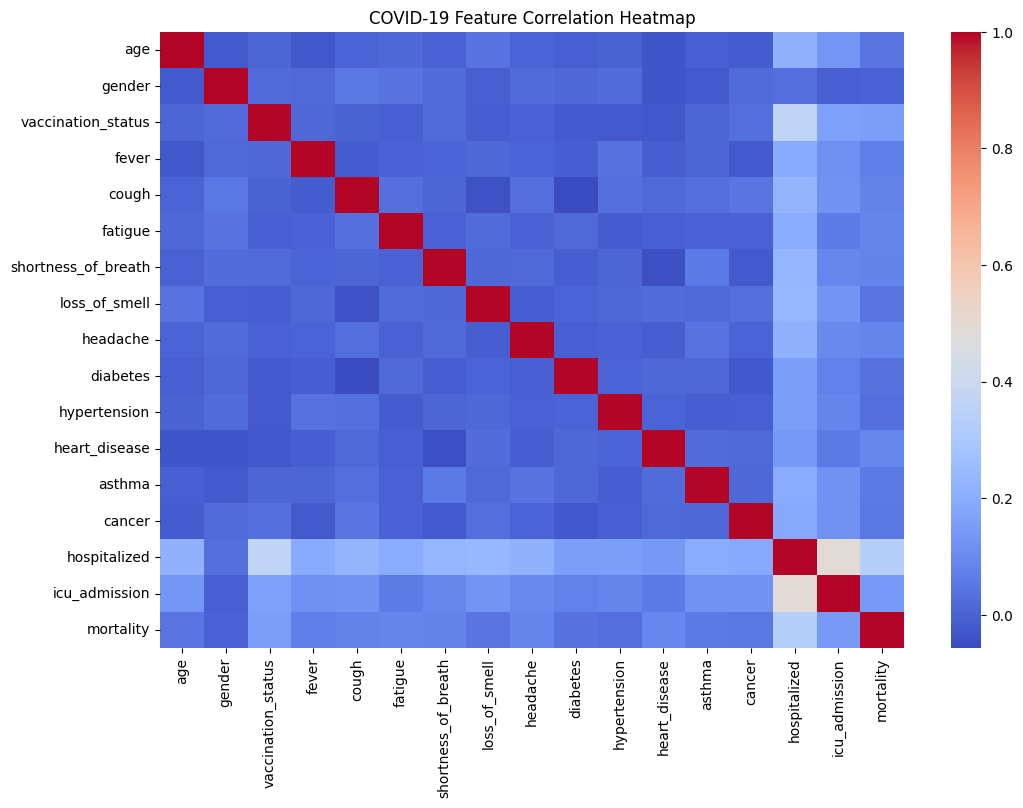

Task 4 Completed: Exploratory Data Analysis Done 


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("COVID-19 Feature Correlation Heatmap")
plt.show()
print("Task 4 Completed: Exploratory Data Analysis Done ")


In [7]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Original Feature Shape:", X_train_scaled.shape)
print("Reduced Feature Shape after PCA:", X_train_pca.shape)
print("\nExplained Variance Ratio of each PCA Component:")
print(pca.explained_variance_ratio_)
print("\nTotal Variance Captured by 5 Components:",
      sum(pca.explained_variance_ratio_))
print("\nFirst 5 rows of PCA-transformed training data:")
display(pd.DataFrame(X_train_pca[:5],
         columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]))
print("\nTask 5 Completed: PCA Feature Reduction Done ")

Original Feature Shape: (2400, 16)
Reduced Feature Shape after PCA: (2400, 5)

Explained Variance Ratio of each PCA Component:
[0.09775831 0.0718464  0.06979419 0.06787045 0.06637039]

Total Variance Captured by 5 Components: 0.37363973727971184

First 5 rows of PCA-transformed training data:


,PC1,PC2,PC3,PC4,PC5
0,-0.667775,0.241156,-1.731323,0.642859,-0.167364
1,-0.762762,0.002865,-0.580478,0.516034,-0.556774
2,2.433813,2.635300,-0.827298,0.021071,-0.646375
3,0.348844,0.687637,-0.993886,0.794723,-0.766863
4,2.875272,0.607579,-1.245123,-1.343141,-1.383809



Task 5 Completed: PCA Feature Reduction Done 


In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)
rf_model.fit(X_train_pca, y_train)
gb_model.fit(X_train_pca, y_train)
svm_model.fit(X_train_pca, y_train)
print("Model Training Completed Successfully!\n")
print("Random Forest Model Trained ")
print("Gradient Boosting Model Trained ")
print("Support Vector Machine (SVM) Model Trained ")
print("\nTask 6 Completed: Model Training Done ")

Model Training Completed Successfully!

Random Forest Model Trained 
Gradient Boosting Model Trained 
Support Vector Machine (SVM) Model Trained 

Task 6 Completed: Model Training Done 


In [9]:
from sklearn.metrics import accuracy_score, classification_report
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "SVM": svm_model
}
for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    print("="*50)
    print(f"{name} Model Evaluation")
    print("="*50)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
print("\nTask 7 Completed: Model Evaluation Done ")

Random Forest Model Evaluation
Accuracy Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       412
           1       0.93      0.87      0.90       188

    accuracy                           0.94       600
   macro avg       0.94      0.92      0.93       600
weighted avg       0.94      0.94      0.94       600

Gradient Boosting Model Evaluation
Accuracy Score: 0.9366666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       412
           1       0.91      0.89      0.90       188

    accuracy                           0.94       600
   macro avg       0.93      0.92      0.93       600
weighted avg       0.94      0.94      0.94       600

SVM Model Evaluation
Accuracy Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       412
 